# July

## 24th

### (E) 589. N-ary Tree Preorder Traversal

**Follow up: Recursive solution is trivial, could you do it iteratively?**

Sample tree for the test<br><br>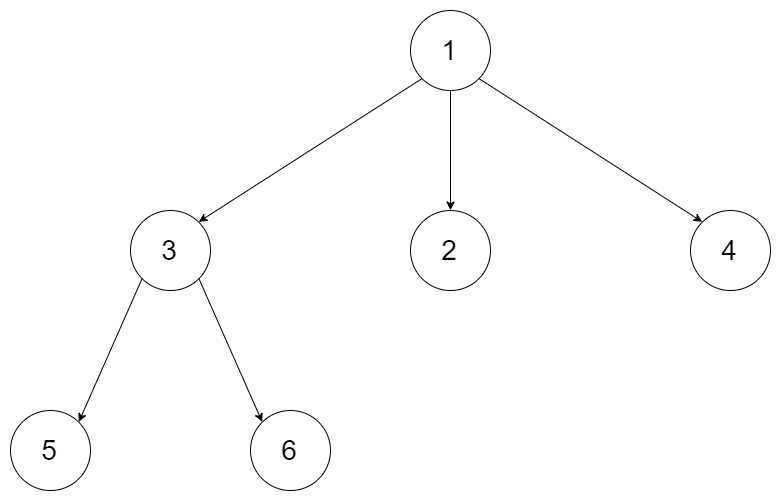

In [ ]:
class Node(object):
    def __init__(self, val=None, children=None):
        self.val = val
        self.children = children

root = Node(1)
root.children = [Node(3), Node(2), Node(4)]
root.children[0].children = [Node(5), Node(6)]

Recursive - 84 / 13

In [ ]:
class Solution(object):
    def preorder(self, root):
        """
        :type root: Node
        :rtype: List[int]
        """
        if root == None:
          return []
        def DFS(parent):
  
            # ending condition #
            if parent.children == None:
              return


            children = parent.children
            for child in children:
              arr.append(child.val)
              DFS(child)

        arr = [root.val]
        DFS(root)
        return arr


print(Solution().preorder(root))
        

[1, 3, 5, 6, 2, 4]


Iterative approach - 27 / 73

In [ ]:
class Solution(object):
    def preorder(self, root):
        """
        :type root: Node
        :rtype: List[int]
        """
        if root == None:
            return []
        
        stack = [root]
        ans = []

        while stack:
            
            temp = stack.pop()
            ans.append(temp.val)
            stack.extend(list(reversed(temp.children)))

        
        return ans

print(Solution().preorder(root))

### (M) 102. Binary Tree Level Order Traversal ★

Sample tree for the test<Br>
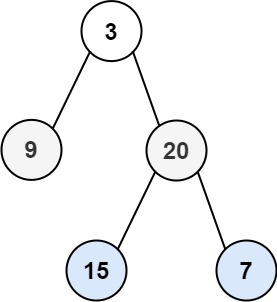

In [ ]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = TreeNode(3)
root.left = TreeNode(9)
root.right = TreeNode(20)

# These two lines are temporary for special test case
#root.left.left = TreeNode('a')
#root.left.right = TreeNode('b')

root.right.left = TreeNode(15)
root.right.right = TreeNode(7)

Iterative approach - 16 / 43

In [ ]:
class Solution(object):
    def levelOrder(self, root):
        
        if root == None:
          return []

        old_queue = [root]
        new_queue = []
        output = [[root.val]]

        while True:
          node = old_queue.pop(0)

          if node.left != None:
            new_queue.append(node.left)

          if node.right != None:
            new_queue.append(node.right)

          if old_queue == []:
            if new_queue != []:

              output.append(list(map(lambda x: x.val, new_queue)))
              old_queue = new_queue
              new_queue = []

            else:
              break

        return output
        

(Better) Iterative approach 2 - 82 / 44 (24ms)

This solution springs from BFS idea

In [ ]:
class Solution(object):
    def levelOrder(self, root):
        
        if root == None:
          return []
        
        cnt_p = 1 # cnt_p : count for parents / decrement when popping from queue
        cnt_c = 0 # cnt_c : count for children / increment when child nodes are stacked in queue
        
        # when the phase changes, child nodes become parent nodes
        # => cnt_p is refreshed into cnt_c, cnt_c is reset such that I can count # of child nodes in the next phase

        queue = [root] # queue for 
        output = [[root.val]]

        while queue != []:
          node = queue.pop(0)
          
          ## One-line code below will help u to visually understand what's going on.
          print(list(map(lambda x: x.val, queue)))

          cnt_p -= 1 # decrement the count for parents

          if node.left != None:
            queue.append(node.left)
            cnt_c += 1 # increment the count for children

          if node.right != None:
            queue.append(node.right)
            cnt_c += 1 # increment the count for children

 
          ## Go to the next phase or not ##
          
          if cnt_p == 0: # if we popped all parent nodes

            if cnt_c != 0: # only when new child nodes exist
              output.append(list(map(lambda x: x.val, queue))) # ※ output contains values, not nodes themselves
              print('Queue is appended to output since the phase will change!')
              cnt_p, cnt_c = cnt_c, 0 # In the next phase, previous child nodes become parent nodes -> cnt_p = cnt_c / cnt_c is reset 
            
            else: # run out of parent nodes and also child nodes
              break

          

        return output
        
print(Solution().levelOrder(root))

[[3], [9, 20], [15, 7]]


Iterative & memory super-efficient way (from leetcode discussion)

In [ ]:
class Solution:
    def levelOrder(self, root: TreeNode) -> List[List[int]]:
        if not root:
            return []
        
        result: List[List[int]] = []
        lay = [root]
        while lay:
            lay_values = []
            next_lay = []
            
            for node in lay:
                lay_values.append(node.val)
                if node.left:
                    next_lay.append(node.left)
                if node.right:
                    next_lay.append(node.right)
            
            lay = next_lay
            result.append(lay_values)
        
        return result

Recursive way using BFS (from leetcode discussion) - 14 / 20

In [ ]:
class Solution(object):
    def levelOrder(self, root):
        if not root:
            return []
        
        answer = []
        self.traverse(root, 1, answer)
        return answer
    
    def traverse(self, node, level, answer):
        if not node:
            return 
        
        if level > len(answer):
            # we are at a new level
            answer.append([node.val])
        else:
            answer[level-1].extend([node.val])
        
        self.traverse(node.left, level + 1, answer)
        self.traverse(node.right, level + 1, answer) 
        

### (E) 704. Binary Search

Standard template : 56 / 9

In [ ]:
nums = [-1,0,3,5,9,12]
target = 9

class Solution(object):
    def search(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: int
        """

        l = 0
        r = len(nums) - 1


        while l <= r:
          mid = (l + r) // 2

          if nums[mid] < target:
            l = mid + 1
          elif nums[mid] > target:
            r = mid - 1
          else: # find the answer
            return mid

        return -1

print(Solution().search(nums, target))

Faster - 72 / 25

In [ ]:
class Solution(object):
    def search(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: int
        """

        l = 0
        r = len(nums) - 1


        while l <= r:

          if nums[(l + r) // 2] < target:
            l = (l + r) // 2 + 1
          elif nums[(l + r) // 2] > target:
            r = (l + r) // 2 - 1
          else: # find the answer
            return (l + r) // 2

        return -1

Memory efficient - 30 / 53

In [ ]:
nums = [-1,0,3,5,9,12]
target = 9

class Solution(object):
    def search(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: int
        """

        LR = [0, len(nums) - 1]


        while LR[0] <= LR[1]:

          if nums[sum(LR) // 2] < target:
            LR[0] = sum(LR) // 2 + 1
          elif nums[sum(LR) // 2] > target:
            LR[1] = sum(LR) // 2 - 1
          else: # find the answer
            return sum(LR) // 2

        return -1

print(Solution().search(nums, target))

Using bisect (from leetcode solution) - 51 / 77

[Bisect explanation](https://programming119.tistory.com/196)

In [ ]:
class Solution:
    def search(self, nums, target):
        index = bisect.bisect_left(nums, target)
        return index if index < len(nums) and nums[index] == target else -1

### (E) 257. Binary Tree Paths

Sample binary tree for the test<br>
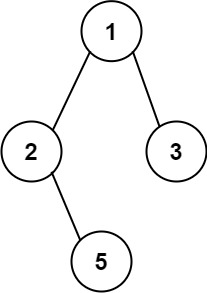

In [ ]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.right = TreeNode(5)

75 / 54

In [ ]:
class Solution(object):
    def binaryTreePaths(self, root):
        
        path = ''
        ans = []


        def func(path, parent):

          path = path + str(parent.val) + '->'
          
          # Stopper #
          if (parent.left == None) and (parent.right == None) :
            ans.append(path[:-2])
            return

          # if didn't stop at 'Stopper', we gotta go to only one way
          for child in [parent.left, parent.right]:
            if child == None:
              continue
            func(path, child)


        func(path, root)
        return ans

print(Solution().binaryTreePaths(root))

['1->2->5', '1->3']


## 25th

### (E) 235. Lowest Common Ancestor of a Binary Search Tree

Sample tree for the test<br>
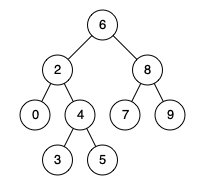

In [ ]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

root = TreeNode(6)
root.left = TreeNode(2)
root.right = TreeNode(8)
root.left.left = TreeNode(0)
root.left.right = TreeNode(4)
root.left.right.left = TreeNode(3)
root.left.right.right = TreeNode(5)
root.right.left = TreeNode(7)
root.right.right = TreeNode(9)

Pseudocode

1. Given p and q, define the function that finds a path toward the given node and returns it.
2. Extract the first common element between two lists.

At first I misunderstood the problem - I viewed p and q as values, not as nodes. I posted this solution not being aware of that issue, so my original code (almost the same to this code) is on [this link](https://stackoverflow.com/questions/73103624/my-solution-for-leetcode-problem-235-works-well-in-local-but-is-rejected-by-leet/73105119#73105119). -75 / 93

In [ ]:
class Solution:
    def lowestCommonAncestor(self, root, p, q):
        def pathFind(path, node, target):
            path.append(node)
            if node.val == target:
                return path
            elif node.val < target:
                return pathFind(path, node.right, target)
            elif node.val > target:
                return pathFind(path, node.left, target)
            else:
                return None

        path_p = pathFind([], root, p.val) 
        path_q = pathFind([], root, q.val)
        for idx, (a, b) in enumerate(zip(path_p, path_q)):
            if a != b:
                return path_p[idx - 1]
        return path_p[idx]

### (M) 103. Binary Tree Zigzag Level Order Traversal

Similar to No 102. Binary Tree Level Order Traversal

Sample tree for the test<br>
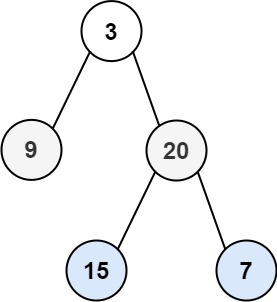

In [ ]:
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

root = TreeNode(3)
root.left = TreeNode(9)
root.right = TreeNode(20)

# These two lines are temporary for special test case
#root.left.left = TreeNode('a')
#root.left.right = TreeNode('b')

root.right.left = TreeNode(15)
root.right.right = TreeNode(7)

94 / 40

In [ ]:
class Solution(object):
    def zigzagLevelOrder(self, root):
        
        if root == None:
          return []
        
        cnt_p = 1 # cnt_p : count for parents / decrement when popping from queue
        cnt_c = 0 # cnt_c : count for children / increment when child nodes are stacked in queue
        flag = 1 # 1 : left to right (ordinary) / -1 : right to left (opposite direction)

        # when the phase changes, child nodes become parent nodes
        # => cnt_p is refreshed into cnt_c, cnt_c is reset such that I can count # of child nodes in the next phase

        queue = [root] # queue for 
        output = [[root.val]]

        while queue != []:
          node = queue.pop(0)
          
          ## One-line code below will help u to visually understand what's going on.
          #print(list(map(lambda x: x.val, queue)))

          cnt_p -= 1 # decrement the count for parents

          if node.left != None:
            queue.append(node.left)
            cnt_c += 1 # increment the count for children

          if node.right != None:
            queue.append(node.right)
            cnt_c += 1 # increment the count for children

 
          ## Go to the next phase or not ##
          
          if cnt_p == 0: # if we popped all parent nodes

            if cnt_c != 0: # only when new child nodes exist
              if flag == 1:
                output.append(list(map(lambda x: x.val, list(reversed(queue))))) # ※ output contains values, not nodes themselves
                flag *= -1
              else:
                output.append((list(map(lambda x: x.val, queue))))
                flag *= -1
              #print('Queue is appended to output since the phase will change!')
              cnt_p, cnt_c = cnt_c, 0 # In the next phase, previous child nodes become parent nodes -> cnt_p = cnt_c / cnt_c is reset 
            
            else: # run out of parent nodes and also child nodes
              break

          

        return output
        
print(Solution().levelOrder(root))

[[3], [20, 9], [15, 7]]
